# Position of a Quasar

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

### 1. Homoscedastic Gaussians

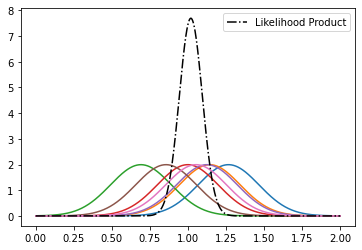

In [4]:
mu = 1
sigma = 0.2
N = 7
np.random.seed(10)

positions = norm.rvs(mu, sigma, N)

distrib = []

x_axis = np.linspace(0, 2, 1000)

for i in range(N):
    temporary = norm(positions[i], sigma)
    distrib.append(temporary.pdf(x_axis))
    plt.plot(x_axis, temporary.pdf(x_axis))

distrib = np.array(distrib)
likelihood = np.prod(distrib, axis=0)

plt.plot(x_axis, likelihood, c='black', ls='dashdot', label='Likelihood Product')
plt.legend()
plt.show()

### 2. Heteroscedastic Gaussians